# 05. Analytics - PySpark

## 05.1. Importação das bibliotecas

### 05.1.1. Importando as bibliotecas nativas do Python

In [1]:
import sys

### 05.1.2. Importando as bibliotecas de terceiros

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### 05.1.3. Importando os módulos locais do projeto

In [3]:
sys.path.append('..')
import functions.fn_charts_pandas as fn_charts_pandas
import functions.fn_stats_pyspark as fn_stats_pyspark
import params.consts as consts

## 05.2. Visão geral dos dados

### 05.2.0. Iniciando a sessão Spark

In [4]:
spark = SparkSession.builder.appName('spark').getOrCreate()

### 05.2.1. Habilitando a exibição de todas as colunas

In [5]:
pd.set_option('display.max_columns', None)

### 05.2.2. Armazenando o dataset em uma variável

In [6]:
df = spark.read \
    .format('parquet') \
    .load(consts.DATASET_CLUSTERED_PYSPARK)

### 05.2.3. Exibindo o dataset

In [7]:
df.show(5)

+----------+--------------+--------+-----------+---+--------+-------+-------+--------+-----------------+-------------------+-------------------+--------------------+-----------------+-----------------+-----------------+---------------+------------+--------+----------------+--------------+--------+-------+
| Education|Marital_Status|Children|HasChildren|Age|AgeGroup| Income|Recency|Complain|Dt_Customer_Month|Dt_Customer_Quarter|Days_Since_Enrolled|Years_Since_Enrolled|NumDealsPurchases|NumWebVisitsMonth|NumTotalPurchases|MntRegularProds|MntGoldProds|MntTotal|AcceptedCmpTotal|HasAcceptedCmp|Response|Cluster|
+----------+--------------+--------+-----------+---+--------+-------+-------+--------+-----------------+-------------------+-------------------+--------------------+-----------------+-----------------+-----------------+---------------+------------+--------+----------------+--------------+--------+-------+
|       PhD|        Single|       0|          0| 40|   31-45|63159.0|     74|  

## 05.3. Consolidação dos dados

### 05.3.1. Agrupando colunas e salvando em csv na camada gold para análise

- Agrupamento da coluna: Education
+----------+----------+-----+
|Education |Percentage|Count|
+----------+----------+-----+
|2n Cycle  |9.0       |198  |
|Basic     |2.4       |54   |
|Graduation|50.5      |1113 |
|Master    |16.5      |364  |
|PhD       |21.6      |476  |
+----------+----------+-----+



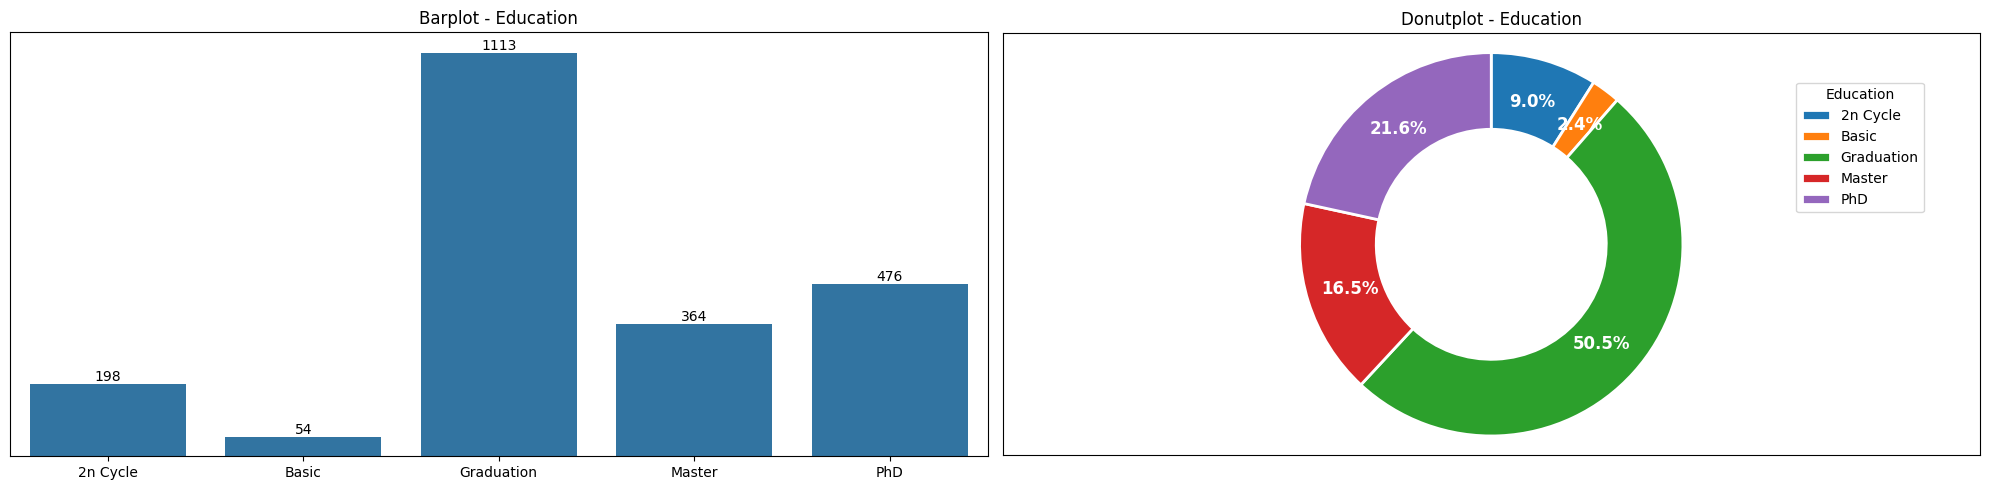

- Agrupamento da coluna: Marital_Status
+--------------+----------+-----+
|Marital_Status|Percentage|Count|
+--------------+----------+-----+
|Partner       |64.5      |1422 |
|Single        |35.5      |783  |
+--------------+----------+-----+



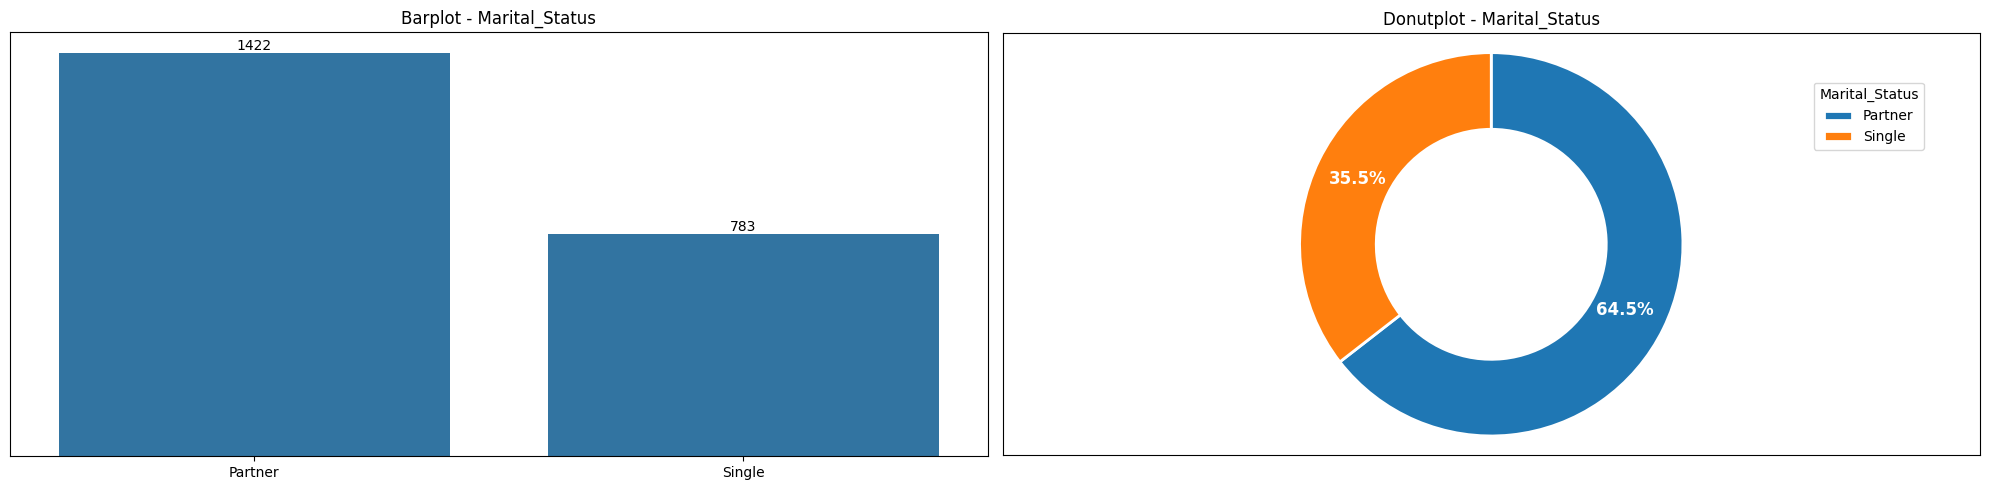

- Agrupamento da coluna: Children
+--------+----------+-----+
|Children|Percentage|Count|
+--------+----------+-----+
|0       |28.5      |628  |
|1       |50.4      |1112 |
|2       |18.8      |415  |
|3       |2.3       |50   |
+--------+----------+-----+



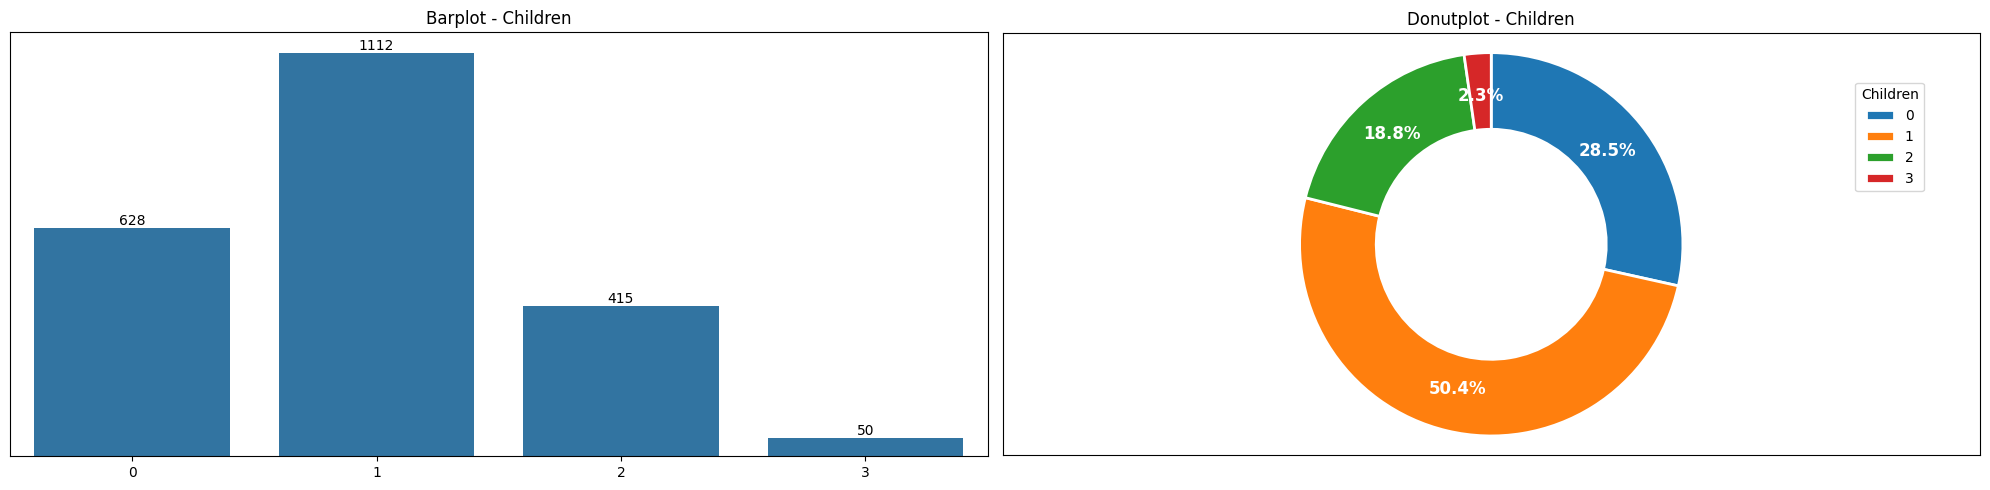

- Agrupamento da coluna: AgeGroup
+--------+----------+-----+
|AgeGroup|Percentage|Count|
+--------+----------+-----+
|18-30   |11.7      |257  |
|31-45   |43.4      |958  |
|46-60   |33.0      |727  |
|61+     |11.9      |263  |
+--------+----------+-----+



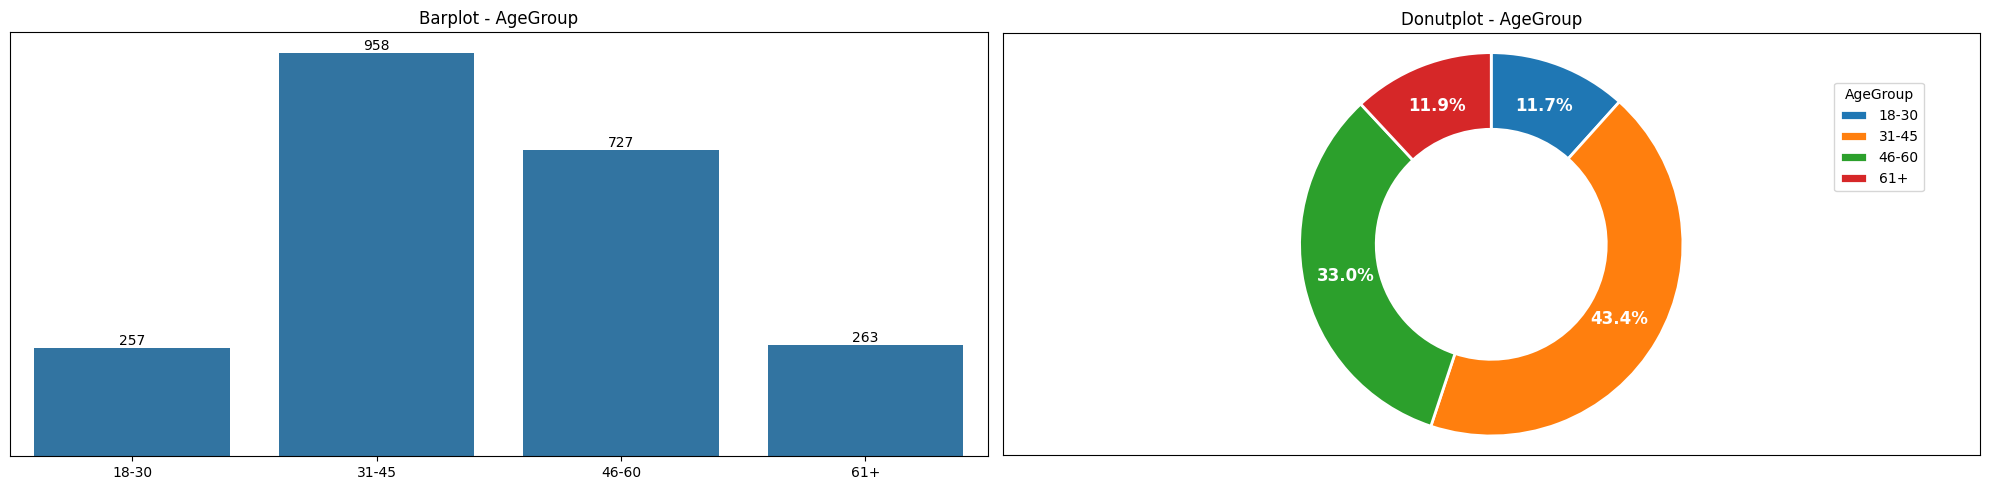

- Agrupamento da coluna: AcceptedCmpTotal
+----------------+----------+-----+
|AcceptedCmpTotal|Percentage|Count|
+----------------+----------+-----+
|0               |79.2      |1747 |
|1               |14.6      |322  |
|2               |3.7       |81   |
|3               |2.0       |44   |
|4               |0.5       |11   |
+----------------+----------+-----+



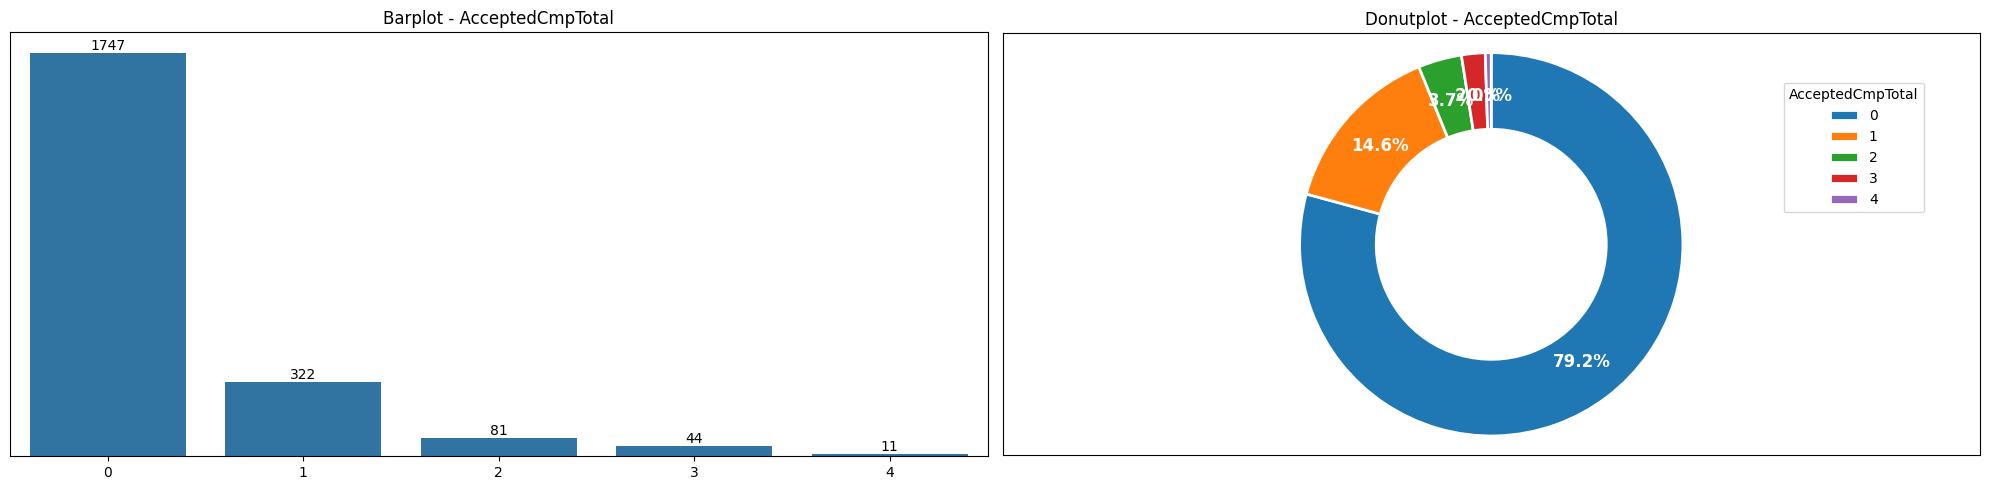

- Agrupamento da coluna: Response
+--------+----------+-----+
|Response|Percentage|Count|
+--------+----------+-----+
|0       |84.9      |1872 |
|1       |15.1      |333  |
+--------+----------+-----+



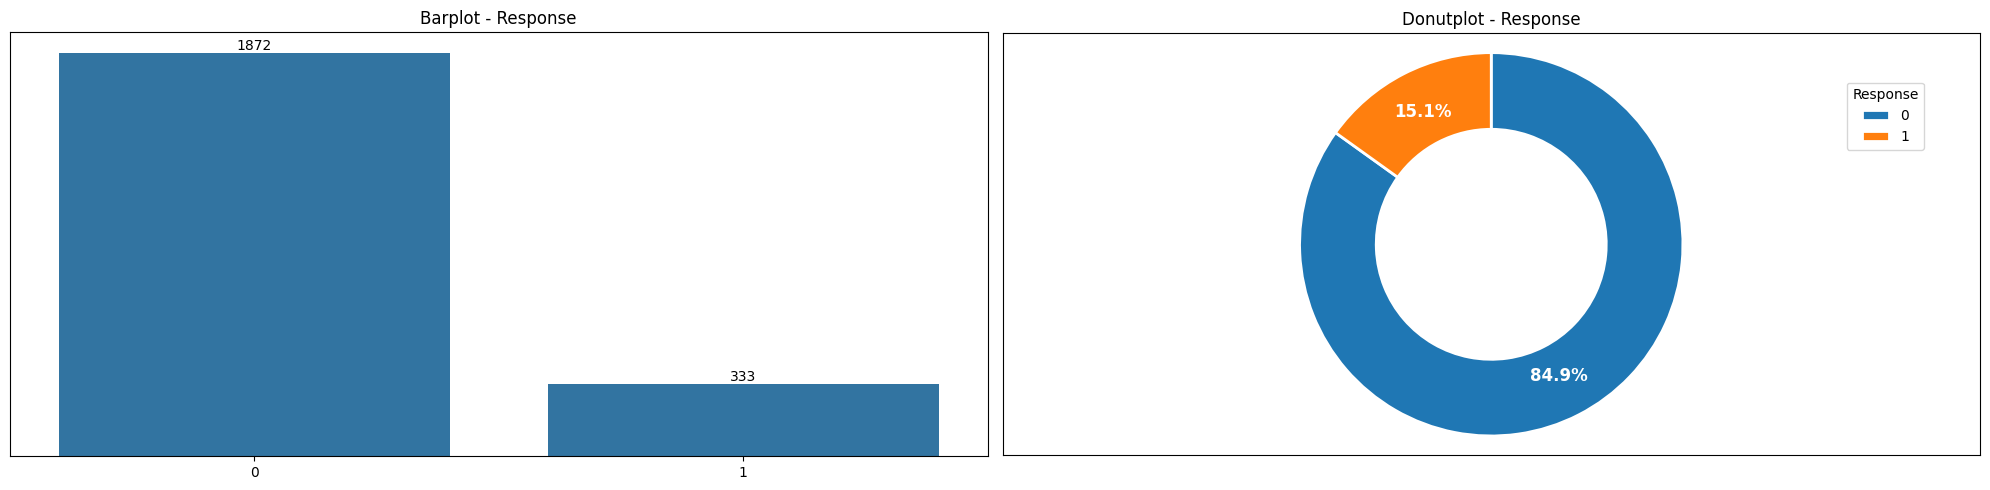

- Agrupamento da coluna: Cluster
+-------+----------+-----+
|Cluster|Percentage|Count|
+-------+----------+-----+
|0      |33.8      |745  |
|1      |41.3      |910  |
|2      |24.9      |550  |
+-------+----------+-----+



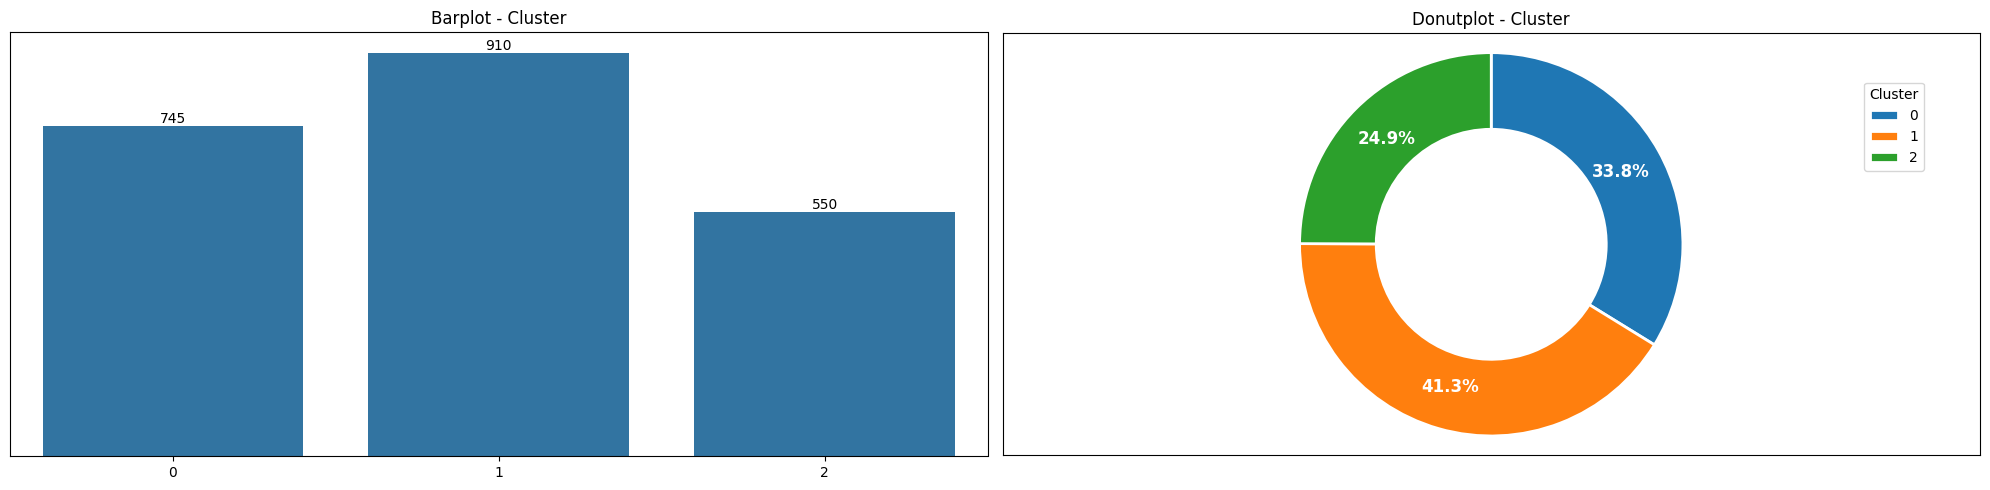

In [8]:
columns = ['Education', 'Marital_Status', 'Children', 'AgeGroup', 'AcceptedCmpTotal', 'Response', 'Cluster']

for i in columns:

    df_agg = fn_stats_pyspark.groupby_count(df, i)

    print(f'- Agrupamento da coluna: {i}')
    
    df_agg.show(truncate = False)

    df_agg.coalesce(1).write \
        .format('csv') \
        .mode('overwrite') \
        .option('header', 'true') \
        .option('sep', ',') \
        .save(f'../data/04_gold/agg_{i.lower()}_pyspark')

    fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), i, 'Count')

    plt.savefig(f'../images/outputs/charts/pyspark/nb05_barplot_donutplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()